<a href="https://colab.research.google.com/github/jpscard/Unyleya_IA_Specialization/blob/main/Classifica%C3%A7%C3%A3o_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Atividade 2 - Deep Learning - Unyleya*
## *Aluno:João Paulo da Silva Cardoso*

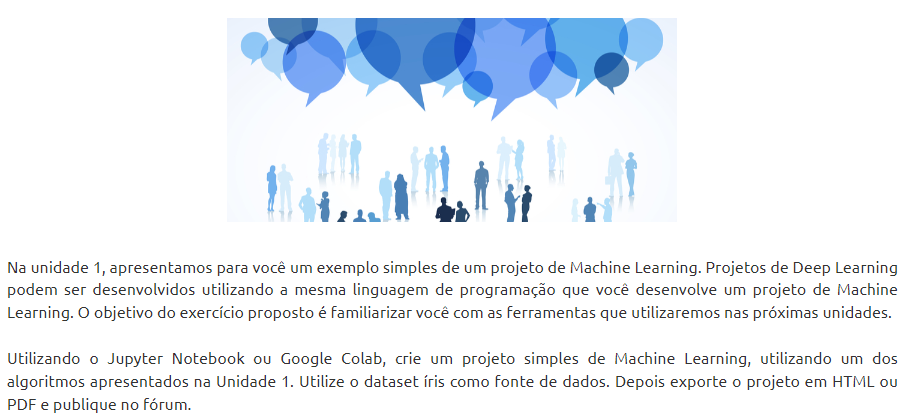

## **1 - Importando as bibliotecas**

In [1]:
import os
from google.colab import drive
from google.colab import auth
from google.colab import files
import IPython
from IPython.display import Image
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para dividir grupos de treino e teste
from sklearn.model_selection import train_test_split

# Importando os modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Impoprtando métricas para mensurar performance e comparação entre os modelos
from sklearn import metrics

# Configurar estilo seaborn para gráficos
sns.set_style('darkgrid')

## **2 - Importando e carregando o dataset**

### **2.1 Importando o dataset**

In [2]:
# Importanto o dataset Iris via biblioteca sklearn
from sklearn.datasets import load_iris

### **2.2 Carregar dataset**

In [3]:
# Carregar o dataset e converter para dataframe
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['target'] = pd.Series(iris['target'], name = 'target_values')
df['target_names'] = df['target'].replace([0,1,2],
['iris-' + species for species in iris['target_names'].tolist()])

## **3 -Análise exploratória de dados**

### **3.1 Exibindo informações iniciais**

In [4]:
# Para exibir as 5 primeiras linhas do dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,iris-setosa
1,4.9,3.0,1.4,0.2,0,iris-setosa
2,4.7,3.2,1.3,0.2,0,iris-setosa
3,4.6,3.1,1.5,0.2,0,iris-setosa
4,5.0,3.6,1.4,0.2,0,iris-setosa


In [5]:
# Para contar a quantidade de ocorrências de cada valor na coluna 'machine_status'
df['target_names'].value_counts()

iris-setosa        50
iris-versicolor    50
iris-virginica     50
Name: target_names, dtype: int64

In [6]:
# Informação sobre o formato do dataframe
df.shape

(150, 6)

In [7]:
# Exibir um resumo das informações do dataframe, como número de linhas, colunas, tipos de dados, uso de memória, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### **3.2 Excluindo colunas com valores nulos ou NaN, além da inicial**

In [8]:
# Verificar se há valores NaN (not a number)
missing_count= df.isnull().sum() # Para contabilizar valores nulos
value_count=df.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # Para indicar o percentual de valores nulos
missing_df= pd.DataFrame({"Quantidade": missing_count, "Percentual": missing_percentage})
print(missing_df)

                   Quantidade  Percentual
sepal length (cm)           0         0.0
sepal width (cm)            0         0.0
petal length (cm)           0         0.0
petal width (cm)            0         0.0
target                      0         0.0
target_names                0         0.0


## **4 - Visualização de dados**

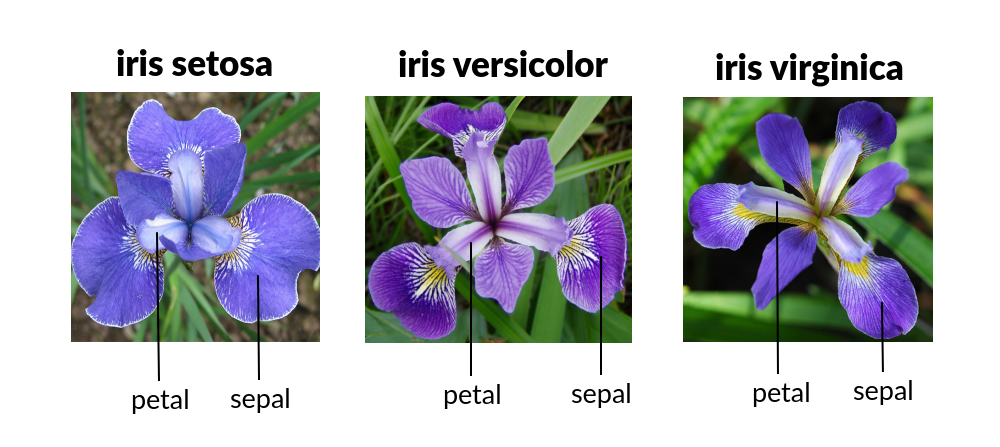

In [9]:
# Variação de medidas da espécie iris-setosa
setosa_min = pd.DataFrame(df[df.target_names =='iris-setosa'].min(), columns=['Mínimo'])[0:4]
setosa_max = pd.DataFrame(df[df.target_names =='iris-setosa'].max(), columns=['Máximo'])[0:4]
pd.concat([setosa_min,setosa_max], axis=1)

,Mínimo,Máximo
sepal length (cm),4.3,5.8
sepal width (cm),2.3,4.4
petal length (cm),1.0,1.9
petal width (cm),0.1,0.6


In [10]:
# Variação das medidas da espécie iris-versicolor
versicolor_min = pd.DataFrame(df[df.target_names =='iris-versicolor'].min(), columns=['Mínimo'])[0:4]
versicolor_max = pd.DataFrame(df[df.target_names =='iris-versicolor'].max(), columns=['Máximo'])[0:4]
pd.concat([versicolor_min,versicolor_max], axis=1)


,Mínimo,Máximo
sepal length (cm),4.9,7.0
sepal width (cm),2.0,3.4
petal length (cm),3.0,5.1
petal width (cm),1.0,1.8


In [11]:
# variação das medidas da espécie iris-virginica
virginica_min = pd.DataFrame(df[df.target_names =='iris-virginica'].min(), columns=['Mínimo'])[0:4]
virginica_max = pd.DataFrame(df[df.target_names =='iris-virginica'].max(), columns=['Máximo'])[0:4]
pd.concat([virginica_min,virginica_max], axis=1)

,Mínimo,Máximo
sepal length (cm),4.9,7.9
sepal width (cm),2.2,3.8
petal length (cm),4.5,6.9
petal width (cm),1.4,2.5


### **4.1 - Gráfico de dispersão**

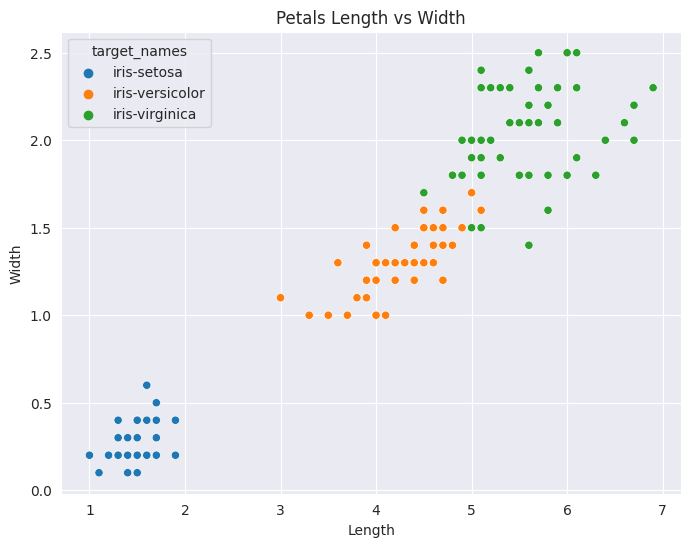

In [12]:
# Mostrar as relações das medidas de largura e comprimento de pétalas de cada espécie
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)', hue = 'target_names')
plt.title('Petals Length vs Width')
plt.xlabel('Length')
plt.ylabel("Width")
plt.show()

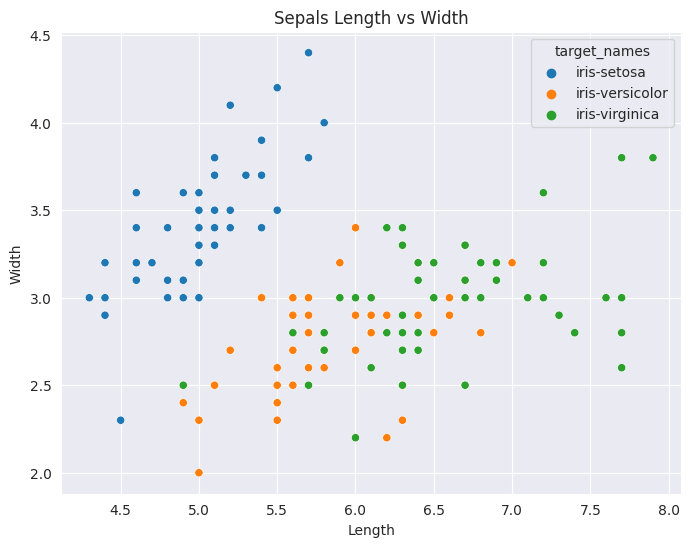

In [13]:
# Mostrar as relações das medidas de largura e comprimento de sépalas de cada espécie
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'target_names')
plt.title('Sepals Length vs Width')
plt.xlabel('Length')
plt.ylabel("Width")
plt.show()

### **4.2 - Histogramas**

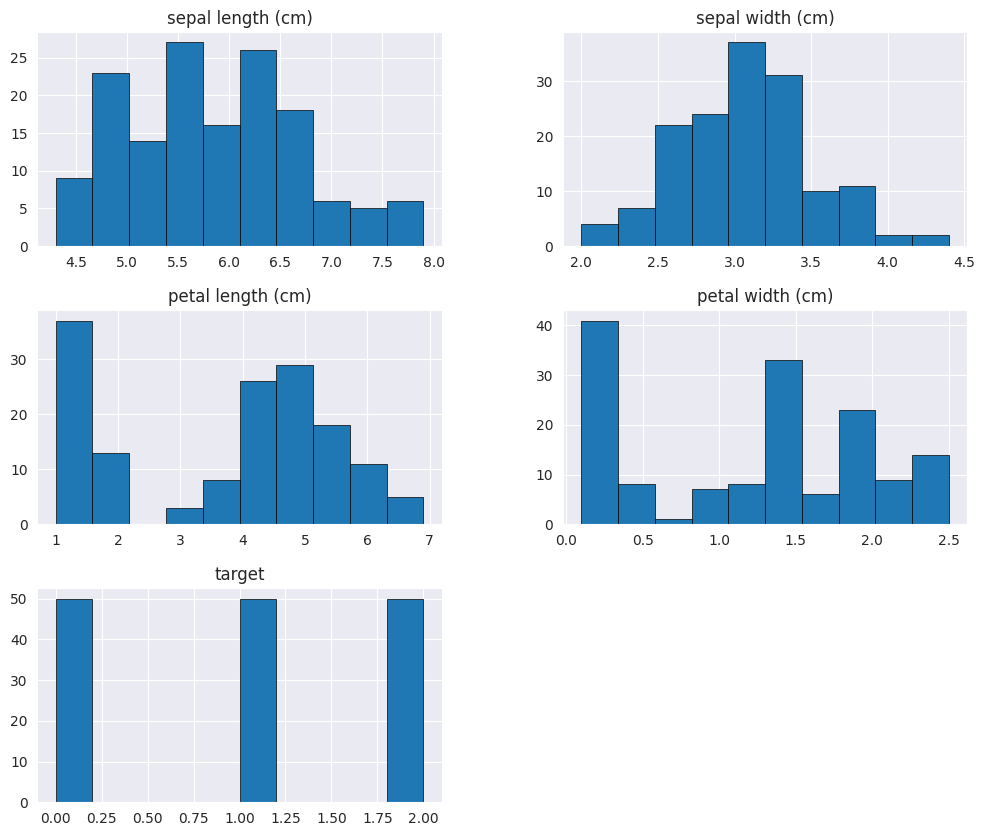

In [14]:
df.hist(figsize=(12,10), edgecolor = 'black', linewidth=0.5)
plt.show()

### **4.3 - Gráfico de pares**

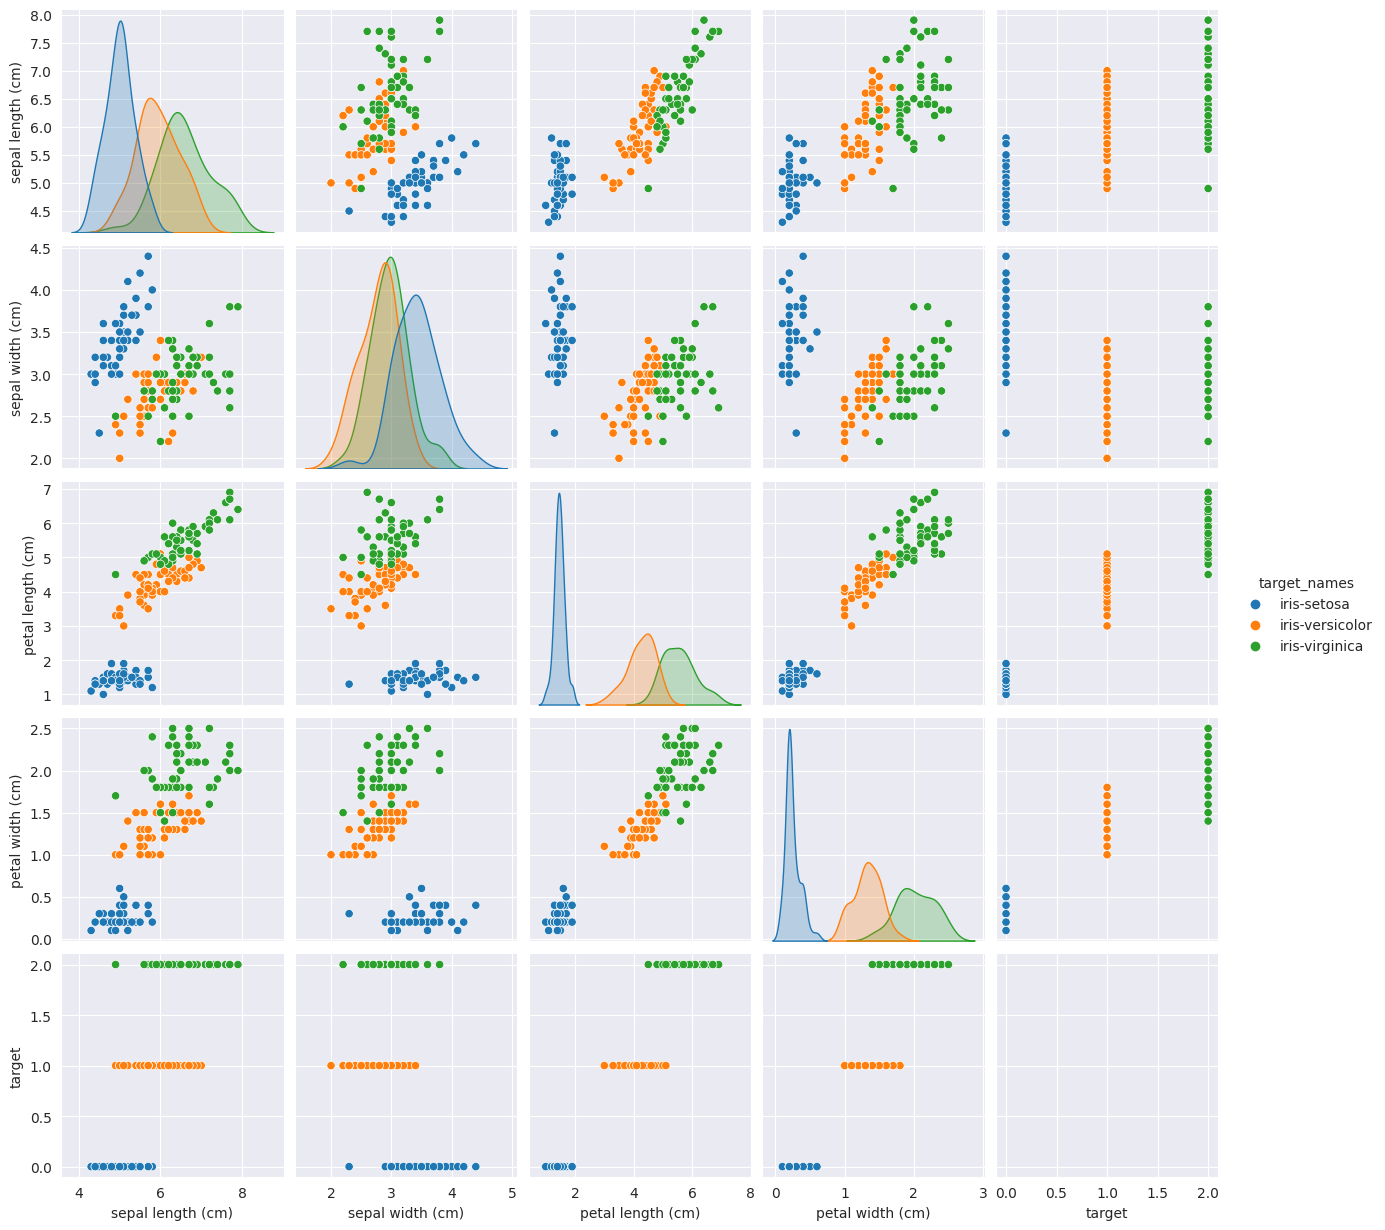

In [15]:
# Visualiza os dados fornecidos para encontrar a relação entre eles, onde as variáveis ​​podem ser contínuas ou categóricas
sns.pairplot(df, hue = 'target_names')

### **4.4 - Gráfico de violino**

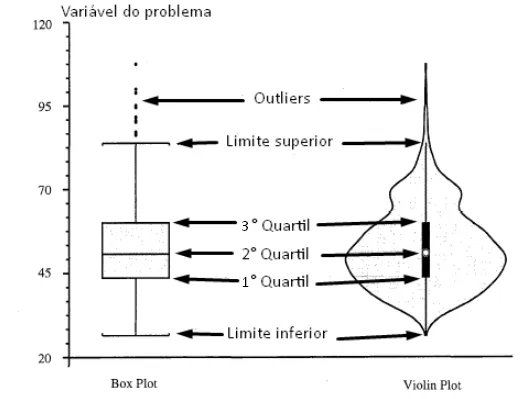

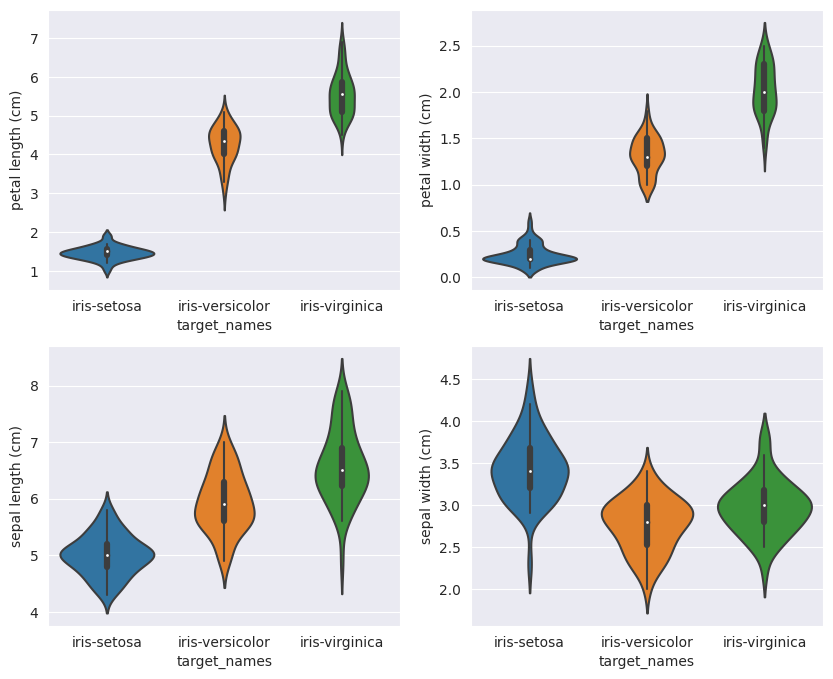

In [16]:
# Mostra a distribuição de dados quantitativos em vários níveis de uma (ou mais) variáveis ​​categóricas de modo que essas distribuições possam ser comparadas.
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x='target_names', y='petal length (cm)', data = df)
plt.subplot(2,2,2)
sns.violinplot(x='target_names', y='petal width (cm)', data = df)
plt.subplot(2,2,3)
sns.violinplot(x='target_names', y='sepal length (cm)', data = df)
plt.subplot(2,2,4)
sns.violinplot(x='target_names', y='sepal width (cm)', data = df)
plt.show()

## **5 - Modelos Preditivos**

In [17]:
# separar as variáveis target e preditoras para fins de teste e treino.
predictors = df.iloc[:,:-2]
target = df['target']

# imprimir algumas linhas pré-determinadas
print('PREDICTORS')
print('----------')
print(predictors.iloc[[10,40,60,80,100,101]])
print('------------------------------------------------')
print('TARGET')
print('------')
print(target.iloc[[10,40,60,80,100,101]])

PREDICTORS
----------
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
10                 5.4               3.7                1.5               0.2
40                 5.0               3.5                1.3               0.3
60                 5.0               2.0                3.5               1.0
80                 5.5               2.4                3.8               1.1
100                6.3               3.3                6.0               2.5
101                5.8               2.7                5.1               1.9
------------------------------------------------
TARGET
------
10     0
40     0
60     1
80     1
100    2
101    2
Name: target, dtype: int64


In [18]:
# Divisão do dataset em dados de treino e de teste. 30% para teste e 70% para treino. Em seguida, o shape da divisão.
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

print('Training Data - 70%: ', X_train.shape, y_train.shape)
print('Testing Data - 30%: ', X_test.shape, y_test.shape)

Training Data - 70%:  (105, 4) (105,)
Testing Data - 30%:  (45, 4) (45,)


### **5.1 Support Vector Machine**

In [19]:
svm_model= svm.SVC(kernel='linear', C=1)
svm_fit = svm_model.fit(X_train, y_train)
svm_prediction = svm_fit.predict(X_test)

svm_metric = metrics.accuracy_score(svm_prediction, y_test)
print("Accuracy", svm_metric)

Accuracy 0.9777777777777777


In [20]:
pd.DataFrame(metrics.confusion_matrix(y_test,svm_prediction, labels=[0,1,2]),
             columns=['setosa_predicted','versicolor_predicted','virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,9,0,0
versicolor_original,0,15,0
virginica_original,0,1,20


### **5.2 Regressão Logística**

In [21]:
lr_model = LogisticRegression()
lr_fit = lr_model.fit(X_train, y_train)
lr_prediction = lr_fit.predict(X_test)

lr_metric = metrics.accuracy_score(lr_prediction, y_test)
print("Accuracy",lr_metric)

Accuracy 0.9777777777777777


In [22]:
pd.DataFrame(metrics.confusion_matrix(y_test,lr_prediction, labels=[0,1,2]),
             columns=['setosa_predicted','versicolor_predicted','virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,9,0,0
versicolor_original,0,15,0
virginica_original,0,1,20


### **5.3 Árvore de Decisão**

In [23]:
dt_model = DecisionTreeClassifier()
dt_fit = dt_model.fit(X_train, y_train)
dt_prediction = dt_fit.predict(X_test)

dt_metric = metrics.accuracy_score(dt_prediction, y_test)
print("Accuracy", dt_metric)

Accuracy 0.9555555555555556


In [24]:
pd.DataFrame(metrics.confusion_matrix(y_test,dt_prediction, labels=[0,1,2]),
             columns=['setosa_predicted','versicolor_predicted','virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,9,0,0
versicolor_original,0,14,1
virginica_original,0,1,20


### **5.4 K-Nearest Neighbor**

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_fit = knn_model.fit(X_train, y_train)
knn_prediction = knn_fit.predict(X_test)

knn_metric = metrics.accuracy_score(knn_prediction, y_test)
print("Accuracy", knn_metric)

Accuracy 0.9555555555555556


In [26]:
pd.DataFrame(metrics.confusion_matrix(y_test,knn_prediction, labels=[0,1,2]),
             columns=['setosa_predicted','versicolor_predicted','virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,9,0,0
versicolor_original,0,14,1
virginica_original,0,1,20


## **6 - Comparação da acurácia entre os modelos**

In [27]:
print('Support Vector Machine:', round(svm_metric,3))
print('Logistic Regression:', round(lr_metric,3))
print('Decision Tree:', round(dt_metric,3))
print('KNeighbor:', round(knn_metric,3))

Support Vector Machine: 0.978
Logistic Regression: 0.978
Decision Tree: 0.956
KNeighbor: 0.956
